In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [91]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"
result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
run_name = "experiment10_10_22_51_50"
# result_loc = "./../../../../Server_results/10_15_2021_fix_update/"
# run_name = "experiment14_10_11_14_39"
train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [92]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [93]:
q_x.shape

(77, 64, 50)

In [94]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [95]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


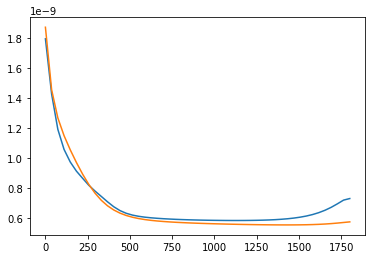

In [96]:
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 11
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


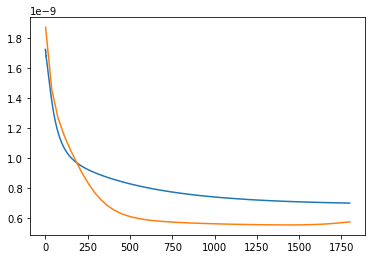

In [103]:
epoch = 31


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

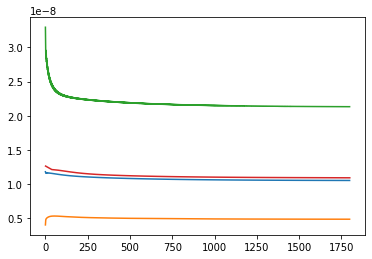

In [104]:
epoch = 31

plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [86]:
p[29,:]

array([3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
      

In [59]:
k_y[31,:,40]

array([1.59625079e-06, 1.01036509e-05, 3.08385751e-06, 1.44228058e-06,
       1.49034342e-06, 1.58048806e-06, 6.68380559e-05, 1.51276240e-06,
       1.42849800e-05, 7.98068335e-06, 3.09946909e-06, 2.71334288e-05,
       2.73296072e-05, 1.58393734e-06, 7.00345386e-05, 3.15414213e-05,
       1.57068515e-06, 1.01374807e-05, 3.09343722e-06, 1.41866137e-06,
       1.46648312e-06, 1.58070530e-06, 6.73780079e-05, 1.51366903e-06,
       1.42866828e-05, 9.09909858e-06, 3.10831573e-06, 2.69675491e-05,
       2.73575950e-05, 1.58891963e-06, 7.01311348e-05, 3.15341150e-05,
       1.60785628e-06, 1.00628592e-05, 3.08507294e-06, 1.43221706e-06,
       1.48114449e-06, 1.58402676e-06, 6.72636194e-05, 1.51660138e-06,
       1.43005114e-05, 7.97652762e-06, 3.08551459e-06, 2.70669288e-05,
       2.73634212e-05, 1.58298620e-06, 6.99337463e-05, 3.16094301e-05,
       1.57161933e-06, 1.00935182e-05, 3.10809971e-06, 1.43824623e-06,
       1.45939593e-06, 1.58222163e-06, 6.71389935e-05, 1.53212154e-06,
      

In [63]:
k_y[35,:,40]

array([5.81309372e-06, 2.90371042e-05, 5.16006483e-06, 2.04715388e-05,
       8.15237577e-06, 5.32113271e-06, 4.54093099e-05, 5.64770598e-06,
       2.84475289e-05, 2.84745018e-05, 5.17539521e-06, 2.60690914e-05,
       2.57852069e-05, 3.73785897e-06, 1.60440420e-04, 5.86842228e-05,
       5.98661227e-06, 2.88410869e-05, 5.27453483e-06, 2.37471074e-05,
       1.92448695e-05, 4.48932851e-06, 4.69848291e-05, 4.69217856e-06,
       2.85120743e-05, 2.90860624e-05, 5.20812215e-06, 2.61090587e-05,
       2.58386546e-05, 3.68003008e-06, 1.67825202e-04, 5.95456748e-05,
       5.85197668e-06, 2.91383376e-05, 5.16254375e-06, 2.17027093e-05,
       8.14696109e-06, 5.28931662e-06, 4.64196171e-05, 5.32101998e-06,
       2.84306548e-05, 2.81796676e-05, 5.11998732e-06, 2.60400658e-05,
       2.58118430e-05, 3.77357126e-06, 5.24552087e-05, 5.99500385e-05,
       6.05248943e-06, 2.87517354e-05, 5.27208900e-06, 4.05083733e-05,
       1.91792448e-05, 4.51331265e-06, 4.66216890e-05, 4.65040238e-06,
      

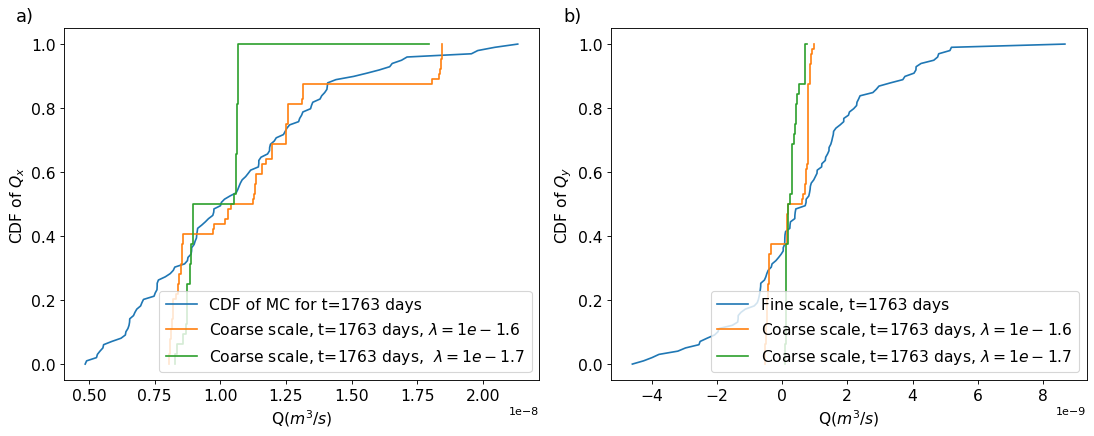

In [80]:
epoch_1 = 31
epoch_2 = 29

time_step = 49


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)


ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [21]:
q_x[epoch,:,39]

array([7.62088106e-09, 1.29099639e-08, 7.24665347e-09, 7.19431969e-09,
       7.79339144e-09, 1.05172840e-08, 1.74084731e-08, 1.04072969e-08,
       1.17912195e-08, 1.17546364e-08, 7.24873085e-09, 1.17499472e-08,
       1.17624280e-08, 1.04010618e-08, 1.51283217e-08, 1.75523239e-08,
       7.55578872e-09, 1.21214713e-08, 7.26599570e-09, 7.72028365e-09,
       7.24893751e-09, 1.05519773e-08, 1.73780228e-08, 1.04032598e-08,
       1.17502946e-08, 1.36276906e-08, 7.25202106e-09, 1.17491813e-08,
       1.17621124e-08, 1.03226089e-08, 2.05922696e-08, 1.76459890e-08,
       7.57406945e-09, 1.34890430e-08, 7.24726005e-09, 7.15017997e-09,
       7.72333366e-09, 1.04901442e-08, 1.74474957e-08, 7.30413720e-09,
       1.17287865e-08, 1.17568865e-08, 7.24497012e-09, 1.17548861e-08,
       1.17542678e-08, 1.04903851e-08, 2.07594709e-08, 1.76397749e-08,
       7.56246910e-09, 1.20233079e-08, 7.26259328e-09, 6.71785858e-09,
       7.25048045e-09, 1.05518093e-08, 1.74421563e-08, 1.04495612e-08,
      

In [22]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [23]:
# b_perc =df_perc


In [43]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.1,0.5,0.9]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$25^{th} / 75^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [84]:
epoch = 1
t = np.linspace(0,1800,N_steps)

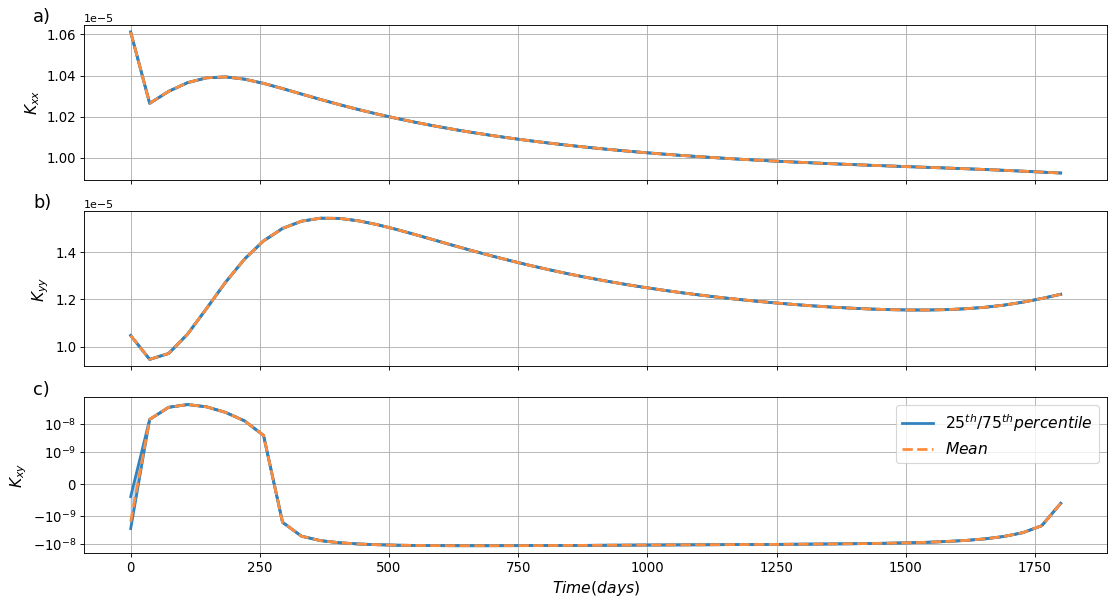

In [99]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-9)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [90]:
k_xy.shape

(77, 64, 50)

In [33]:
lam

array([-2. , -2. , -2. , -2. , -1.9, -1.9, -1.8, -1.8, -1.7, -1.7, -1.6,
       -1.6, -1.5, -1.5, -1.4, -1.4, -1.3, -1.3, -1.2, -1.2, -1.1, -1.1,
       -1. , -1. , -0.9, -0.9, -0.8, -0.8, -0.7])